## Google App Rating Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as map

In [ ]:
df = pd.read_csv("/Users/vaibhavk/Projects/Python Project/googleplaystore.csv")
df.head()

### Removing Nulls from the dataset

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

In [ ]:
nonNulldf = df.dropna()
nonNulldf.shape

In [ ]:
nonNulldf.Size

### Update the Size column to convert MB to KB

In [ ]:
def update(size):
    if 'M' in size:
        i=size[:-1]
        i=float(i)*1000
        return i
    elif 'k' in size:
        i=size[:-1]
        i=float(i)
        return i
    else:
        return None

nonNulldf.Size = nonNulldf.Size.map(update)

In [ ]:
nonNulldf.Size

### Reformatting the columns and converting them to float

In [ ]:
nonNulldf['Reviews'] = nonNulldf['Reviews'].astype('float')

nonNulldf.Installs = nonNulldf.Installs.apply(lambda x: x.replace(',','').replace('+',''))
nonNulldf['Installs'] = nonNulldf['Installs'].astype('float')

nonNulldf.Price = nonNulldf.Price.apply(lambda x: x.replace('$',''))
nonNulldf['Price'] = nonNulldf['Price'].astype('float')

In [ ]:
nonNulldf.dtypes

### Sanity Checks

In [ ]:
validRating = nonNulldf.Rating > 5
validRating.value_counts()

In [ ]:
installs = nonNulldf.Reviews>nonNulldf.Installs
installs.value_counts()

In [ ]:
price = (nonNulldf.Price>0) & (nonNulldf.Type=='Free')
price.value_counts()

### Box Plots

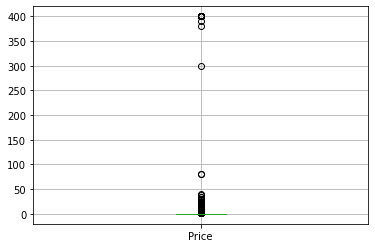

In [21]:
boxplot = nonNulldf.boxplot(column=['Price'])

In [ ]:
boxplot = nonNulldf.boxplot(column=['Reviews'])

### Histograms

In [ ]:
histogram = nonNulldf.hist(column=['Rating'])

In [ ]:
histogram = nonNulldf.hist(column=['Size'])

In [22]:
nonNulldf = nonNulldf[nonNulldf.Price < 200].copy()
nonNulldf.shape

(9345, 13)

In [23]:
highReviews = nonNulldf.Reviews > 2000000
highReviews.value_counts()

False    8892
True      453
Name: Reviews, dtype: int64

In [24]:
nonNulldf = nonNulldf[nonNulldf.Reviews <= 2000000].copy()
nonNulldf.shape

(8892, 13)